In [1]:

!pip install nltk pandas yake multi_rake keybert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 25.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.

In [2]:
import requests
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

URL = "https://ost.ecosyste.ms/api/v1/projects?reviewed=true&per_page=3000"
FILE_TO_SAVE_AS = "projects.json" # the name you want to save file as


resp = requests.get(URL) # making requests to server

with open(FILE_TO_SAVE_AS, "wb") as f: # opening a file handler to create new file
    f.write(resp.content) # writing content to file

In [3]:
raw = pd.read_json(resp.content.decode())
print(raw.shape)
raw.head()

(1932, 29)


,id,name,description,url,last_synced_at,repository,owner,packages,commits,issues_stats,events,keywords,dependencies,score,created_at,updated_at,avatar_url,language,category,sub_category,monthly_downloads,readme,funding_links,readme_doi_urls,works,citation_counts,total_citations,project_url,html_url
0,192460,Planscape,Help regional planners prioritize landscape tr...,https://github.com/ourplanscape/planscape,2024-06-01 11:30:52.445000+00:00,"{'id': 61607584, 'uuid': '553054629', 'full_na...",None,[],"{'full_name': 'ourplanscape/planscape', 'defau...","{'full_name': 'ourplanscape/planscape', 'html_...",None,[],"[{'ecosystem': 'actions', 'filepath': '.github...",NaN,2024-05-09 00:09:52.054000+00:00,2024-06-01 11:30:52.447000+00:00,https://github.com/OurPlanscape.png,TypeScript,Biosphere,Wildfire,0,# Planscape\n\n## Introduction\n**[Planscape](...,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/192460,https://ost.ecosyste.ms/projects/192460
1,21108,RBBGCMuso,A software package that supports the applicati...,https://github.com/hollorol/RBBGCMuso,2024-06-01 11:30:19.802000+00:00,"{'id': 130415114, 'uuid': '75794737', 'full_na...","{'login': 'hollorol', 'name': 'Roland Hollós',...",[],"{'full_name': 'hollorol/RBBGCMuso', 'default_b...","{'full_name': 'hollorol/RBBGCMuso', 'html_url'...","{'total': {'CreateEvent': 41, 'CommitCommentEv...","[biogeochemical-model, ecosystem-model, interf...","[{'ecosystem': 'cran', 'filepath': 'RBBGCMuso/...",5.480639,2023-09-12 07:37:01.013000+00:00,2024-06-01 11:30:19.805000+00:00,https://github.com/hollorol.png,R,Natural Resources,Soil and Land,0,"#+BEGIN_HTML\n<img width=""200px"" align=""right""...",[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/21108,https://ost.ecosyste.ms/projects/21108
2,192499,ComStock,National scale modeling of the U.S. commercial...,https://github.com/nrel/comstock,2024-06-01 11:00:56.903000+00:00,"{'id': 49021111, 'uuid': '305039288', 'full_na...","{'login': 'NREL', 'name': 'National Renewable ...",[],"{'full_name': 'nrel/comstock', 'default_branch...","{'full_name': 'nrel/comstock', 'html_url': 'ht...",None,[],"[{'ecosystem': 'pypi', 'filepath': 'build/sing...",NaN,2024-05-10 00:04:29.674000+00:00,2024-06-01 11:00:56.905000+00:00,https://github.com/NREL.png,Ruby,Consumption,Buildings and Heating,0,# ComStock\nComStock is an NREL model of the U...,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/192499,https://ost.ecosyste.ms/projects/192499
3,23080,BuildingMOTIF,Enabling the semantic interoperability of adva...,https://github.com/NREL/BuildingMOTIF,2024-06-01 11:00:47.905000+00:00,"{'id': 64764265, 'uuid': '460092242', 'full_na...","{'login': 'NREL', 'name': 'National Renewable ...","[{'id': 4457640, 'name': 'buildingmotif', 'eco...","{'full_name': 'NREL/BuildingMOTIF', 'default_b...","{'full_name': 'NREL/BuildingMOTIF', 'html_url'...","{'total': {'ForkEvent': 7, 'CreateEvent': 99, ...",[],"[{'ecosystem': 'actions', 'filepath': '.github...",9.986357,2023-09-12 07:38:20.067000+00:00,2024-06-01 11:00:47.927000+00:00,https://github.com/NREL.png,Jupyter Notebook,Sustainable Development,Taxonomy and Ontology,24,None,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/23080,https://ost.ecosyste.ms/projects/23080
4,27475,Icebergs,Model large tabular icebergs submerged in the ...,https://github.com/NOAA-GFDL/icebergs,2024-06-01 11:00:30.178000+00:00,"{'id': 27900224, 'uuid': '31391889', 'full_nam...","{'login': 'NOAA-GFDL', 'name': 'NOAA - Geophys...",[],"{'full_name': 'NOAA-GFDL/icebergs', 'default_b...","{'full_name': 'NOAA-GFDL/icebergs', 'html_url'...","{'total': {'CreateEvent': 15, 'IssuesEvent': 3...",[],[],5.666427,2023-09-12 07:40:18.894000+00:00,2024-06-01 11:00:30.180000+00:00,https://github.com/NOAA-GFDL.png,Fortran,Cryosphere,Sea Ice,0,# KID (icebergs)\n\n[![Documentation Status](h...,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/27475,https://ost.ecosyste.ms/projects/27475


In [4]:
import pandas as pd
pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth', 50)

#https://www.nltk.org/
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stpwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [5]:
len(raw)

1932

# 1. Goal: Reduce the list of topics below into subtopics


In [6]:
raw['category'].value_counts()

category
Biosphere                  273
Consumption                267
Climate Change             234
Energy Systems             207
Natural Resources          173
Sustainable Development    166
Hydrosphere                135
Renewable Energy           127
Atmosphere                 123
Emissions                   90
Industrial Ecology          53
Cryosphere                  49
Energy Storage              35
Name: count, dtype: int64

In [7]:
raw['sub_category'].value_counts()

sub_category
Energy Modeling and Optimization            117
Biodiversity and Species Distribution        79
Water Supply                                 79
Mobility and Transportation                  73
Buildings and Heating                        70
Agriculture and Nutrition                    66
Soil and Land                                64
Photovoltaics and Solar Energy               59
Climate Data Processing and Analysis         56
Forest Observation and Management            55
Freshwater and Hydrology                     54
Computation and Communication                53
Meteorological Observation and Forecast      51
Marine Life and Fishery                      49
Earth and Climate Modeling                   48
Emission Observation and Modeling            47
Natural Hazard and Storm                     45
Climate Data Access and Visualization        43
Data Catalogs and Interfaces                 43
Energy Distribution and Grids                43
Wind Energy                

In [8]:
df = raw[['name','description','category','sub_category','owner','readme']]
df.head()

,name,description,category,sub_category,owner,readme
0,Planscape,Help regional planners prioritize landscape tr...,Biosphere,Wildfire,None,# Planscape\n\n## Introduction\n**[Planscape](...
1,RBBGCMuso,A software package that supports the applicati...,Natural Resources,Soil and Land,"{'login': 'hollorol', 'name': 'Roland Hollós',...","#+BEGIN_HTML\n<img width=""200px"" align=""right""..."
2,ComStock,National scale modeling of the U.S. commercial...,Consumption,Buildings and Heating,"{'login': 'NREL', 'name': 'National Renewable ...",# ComStock\nComStock is an NREL model of the U...
3,BuildingMOTIF,Enabling the semantic interoperability of adva...,Sustainable Development,Taxonomy and Ontology,"{'login': 'NREL', 'name': 'National Renewable ...",None
4,Icebergs,Model large tabular icebergs submerged in the ...,Cryosphere,Sea Ice,"{'login': 'NOAA-GFDL', 'name': 'NOAA - Geophys...",# KID (icebergs)\n\n[![Documentation Status](h...


# 2. Sample Row

In [9]:
import re
import yake

In [10]:
# Removing words
words_black_list = ['python','pvlib','projects','affiliated','http','readthedocs','benchmarks','license','matlab','user','guide','html','https','open','source','journal',
                    'latest','release','build','publications','conda','installed','google','documentation','please']

## Yake for keyword Extraction
* Using our sample text, we will apply Yake's keyword extraction algorithm

## Rake for keyword Extracion

In [11]:
from multi_rake import Rake

## KeyBERT for keyword extraction
* Using our sample text, we will apply Yake's keyword extraction algorithm

In [12]:
from keybert import KeyBERT

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [13]:
kw_model = KeyBERT('distilbert-base-nli-mean-tokens')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# 3. Cleaning Full Dataset

In [14]:
# Fill null values with 'None'. This will allow us to concatenate the relevant text columns
df = df.fillna('None')

In [15]:
# Combine text columns
combined = df['description']

In [16]:
df['combined'] = combined
df.head()

,name,description,category,sub_category,owner,readme,combined
0,Planscape,Help regional planners prioritize landscape tr...,Biosphere,Wildfire,None,# Planscape\n\n## Introduction\n**[Planscape](...,Help regional planners prioritize landscape tr...
1,RBBGCMuso,A software package that supports the applicati...,Natural Resources,Soil and Land,"{'login': 'hollorol', 'name': 'Roland Hollós',...","#+BEGIN_HTML\n<img width=""200px"" align=""right""...",A software package that supports the applicati...
2,ComStock,National scale modeling of the U.S. commercial...,Consumption,Buildings and Heating,"{'login': 'NREL', 'name': 'National Renewable ...",# ComStock\nComStock is an NREL model of the U...,National scale modeling of the U.S. commercial...
3,BuildingMOTIF,Enabling the semantic interoperability of adva...,Sustainable Development,Taxonomy and Ontology,"{'login': 'NREL', 'name': 'National Renewable ...",None,Enabling the semantic interoperability of adva...
4,Icebergs,Model large tabular icebergs submerged in the ...,Cryosphere,Sea Ice,"{'login': 'NOAA-GFDL', 'name': 'NOAA - Geophys...",# KID (icebergs)\n\n[![Documentation Status](h...,Model large tabular icebergs submerged in the ...


In [17]:
# Words to remove from column. We will keep adding to this list the more words we find that are irrelavent
words_black_list = ['python','projects','affiliated','http','readthedocs','benchmarks',
                    'license','matlab','user','guide','html','https','open','source','journal',
                    'latest','release','build','publications','conda','installed','users','using'
                    'google','documentation','please','github','data','model','install','code',
                    'package','badge','project']

In [66]:
# More words to remove
words_black_list = ['python','tool','based','pvlib','projects','affiliated','http','readthedocs','benchmarks','aims','high','series','functions','large','calculate','applications','flow','easy','contains','state','collection','real','flexsible','program','implementation',
                    'license','matlab','user','guide','html','https','open','source','journal','various','written','toolbox','working','design','related','level','deep','standard','within','applications','methods','toolkits','multi','network','coupled','platform','application','developed',
                    'latest','release','build','publications','conda','installed','users','using','julia','different','toolkit','toolkit','provide','focus','smart','simple','enables','sources','client','advanced','digital','across','suite','domain','estimate','evaluation','measurements','statistical',
                    'google','documentation','please','github','data','model','install','code','numerical','simulation','algorithms','driven','interactive','helps', 'package','resolution','visualization','images','explore','develop','analysis','distributed','calculations','global','control','accessible',
                    'package','badge','project','version','file','view','system','master','used','also','providing','enable','multiple','point','image','process','including','components','computer','easily','built','range','line','calculations','term','uses','faciliate','online',
                    'repository','example','docs','files','information','models','software','available','work','making','visualize','format','load','usage','module','apis','automated','temporal','curated',
                    'zenodo','command','modis','pull','request','pctl','theoj','brodiepearson','blob','getting','order','fast','daily','makes','domaine','around','processes','associated','long',
                    'started','machine','learning','make','sure','pypi','ipcc','main','scholor','colorado','codecov','individual','researchers','historical','metadata','supporting','finite','analyze',
                    'none','jupyter','notebook','united','states','docker','anaconda','forge','datasets','false','would','reference','tracking','identify','general','techniques','scripts','world','libraries','estimating','neutral',
                    'like','gustavoirgang','google','collab','sciencedirect','yaml','downloads','actions','workflows', 'understanding','international','compute','gridded','studies','single','calculates','exchange','potential','robust','dimensional','reporting','development','simulations','flexsible',
                    'media','icon','joss','papers','legend','description','jobs','download','input','output','latitude','longitude',
                    'unit','tests','cran','nbsp','colab','check','plot','ncss','contributing','installation', 'instructions','fortran','complex','simulating','component','access','bottom','flexible','search','agent',
                    'wiki','wikipedia','feel','free','name','list','issues','start','examples','index','dataset','branch','create','high','performance','management','scale',
                    'library','following','test','running','import','database','access','packages','directory','need','tools','simulation','time','framework','systems','designed','community','interface','optimization','allows','support','grid','research','processing','help','provides']

In [67]:
# Create new column called "cleaned_text" and apply different cleaning methods
df['cleaned_text'] = df['combined'].apply(lambda x: x.replace("\\n", " ")) # Replace \\n
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x.lower() for x in str(x).split())) # Lowercase
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x)) # Remove HTML tags
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]',' ', x)) # Remove symbols
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if len(x) > 3)) # Remove short words
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x.isalpha())) # Remove numbers
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in words_black_list)) # Remove words from blacklist
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in stpwords)) # Remove stopwords


In [68]:
df['cleaned_text']

0       regional planners prioritize landscape treatme...
1       supports biome bgcmuso biogeochemical mode sim...
2       national modeling commercial building stock su...
3       enabling semantic interoperability building te...
4       tabular icebergs submerged ocean known kinemat...
                              ...                        
1927                     readers converters soil moisture
1928    automatic pattern classification thin films tw...
1929    compilation ready purpose vegetation natural v...
1930    loading interpolating displaying bedmachine sh...
1931    detecting realtime increased precipitation sud...
Name: cleaned_text, Length: 1932, dtype: object

# 4. Unique Words

* Let's get a look at the most common words in our cleaned_text column

In [69]:
from collections import Counter

# Tokenize text
tokenized_data = [nltk.word_tokenize(text) for text in df['cleaned_text']]

# count the occurrence of each token
token_counts = [Counter(tokens) for tokens in tokenized_data]

# combine the counts from all rows
combined_counts = sum(token_counts, Counter())

In [70]:
# print the top 30 most common tokens
word_freq = combined_counts.most_common(200)
word_freq

[('energy', 285),
 ('climate', 219),
 ('water', 109),
 ('modeling', 109),
 ('power', 99),
 ('carbon', 79),
 ('weather', 79),
 ('earth', 79),
 ('environmental', 78),
 ('emissions', 68),
 ('wind', 64),
 ('ocean', 57),
 ('atmospheric', 54),
 ('change', 53),
 ('soil', 52),
 ('electricity', 50),
 ('building', 49),
 ('solar', 48),
 ('assessment', 47),
 ('land', 47),
 ('surface', 46),
 ('science', 43),
 ('quality', 43),
 ('forest', 41),
 ('species', 41),
 ('consumption', 36),
 ('integrated', 36),
 ('national', 34),
 ('environment', 33),
 ('biodiversity', 32),
 ('monitoring', 30),
 ('modelling', 30),
 ('satellite', 29),
 ('marine', 29),
 ('transport', 29),
 ('meteorological', 29),
 ('forecasting', 29),
 ('generation', 28),
 ('flexible', 28),
 ('impact', 28),
 ('plant', 27),
 ('plants', 27),
 ('well', 27),
 ('tree', 26),
 ('atmosphere', 25),
 ('greenhouse', 25),
 ('battery', 25),
 ('services', 25),
 ('common', 25),
 ('distribution', 24),
 ('european', 24),
 ('impacts', 24),
 ('storage', 23),
 (

In [71]:
!pip install wordcloud

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

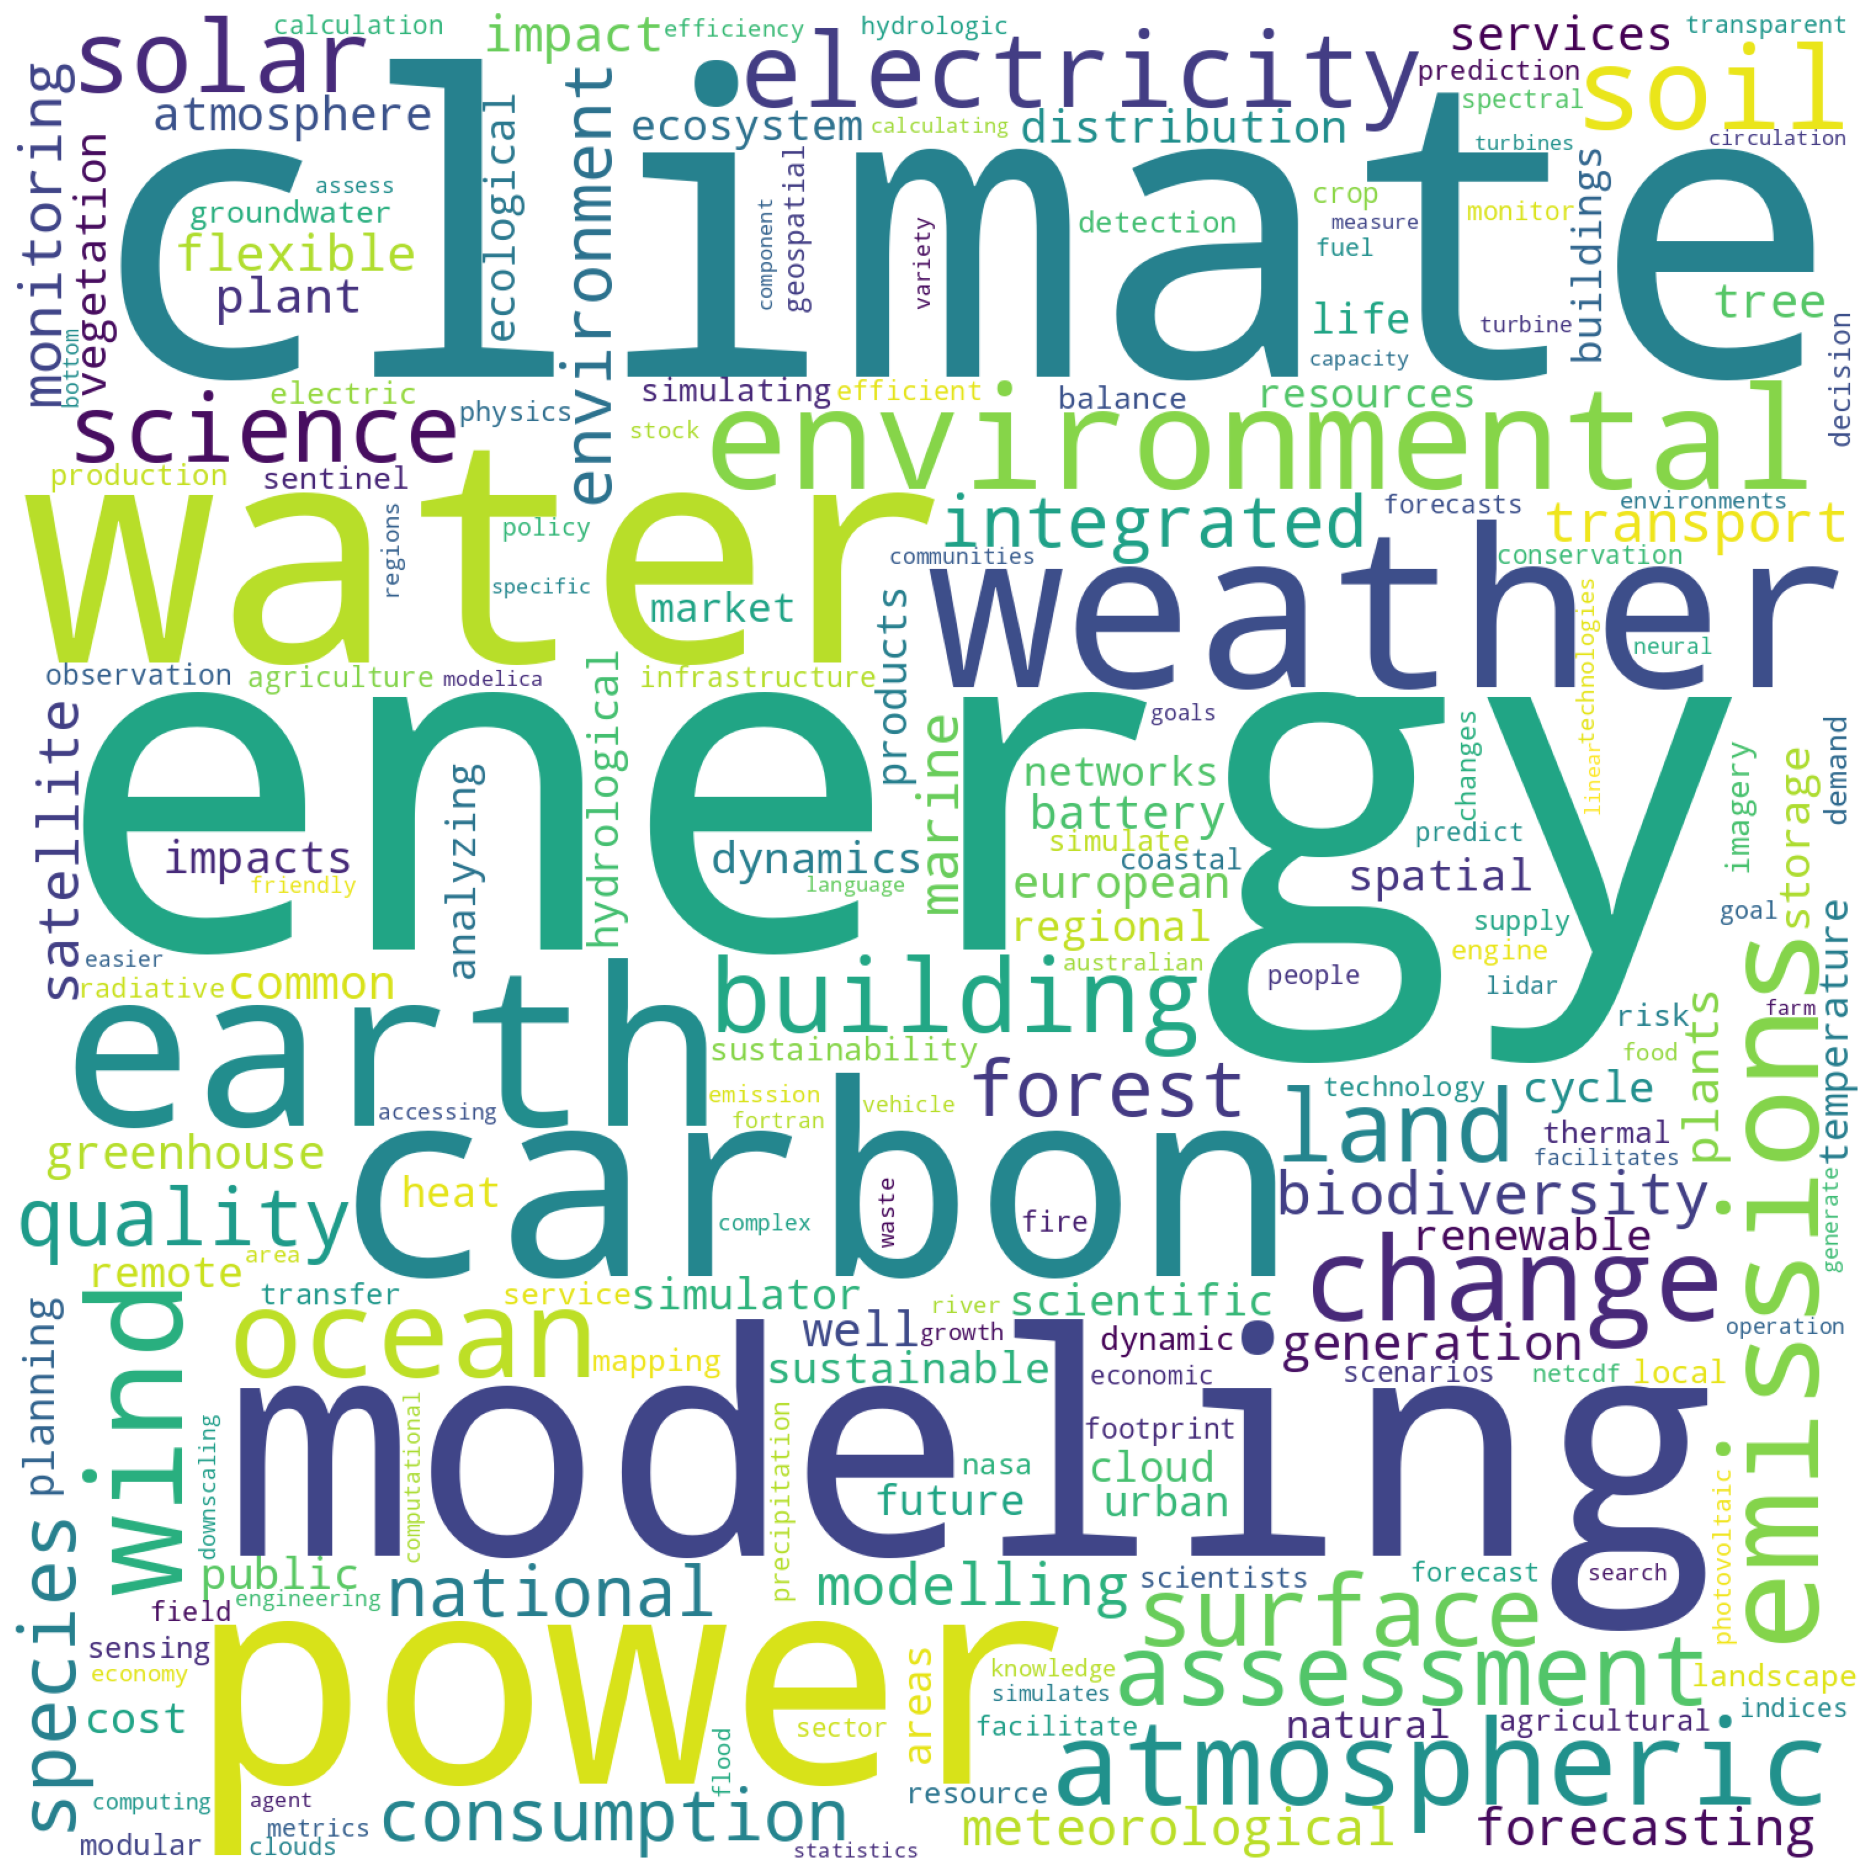

In [73]:
wc = WordCloud(background_color="white", max_words=500,width=1500,height=1500)
wc.generate_from_frequencies(dict(word_freq))
plt.figure(figsize=(20,20))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

# 5. Unique Bigrams and Trigrams

* We should also look at the most common bigrams and trigrams

In [26]:
df['cleaned_text'].str.split()

0       [regional, planners, prioritize, landscape, tr...
1       [supports, biome, bgcmuso, biogeochemical, mod...
2       [national, modeling, commercial, building, sto...
3       [enabling, semantic, interoperability, advance...
4       [tabular, icebergs, submerged, ocean, known, k...
                              ...                        
1927                [readers, converters, soil, moisture]
1928    [automatic, pattern, classification, thin, fil...
1929    [compilation, analysis, ready, purpose, vegeta...
1930    [loading, interpolating, displaying, bedmachin...
1931    [detecting, realtime, increased, precipitation...
Name: cleaned_text, Length: 1932, dtype: object

In [27]:
# Create list of words in the order in which they orignally appear
words = list(df['cleaned_text'].str.split().apply(pd.Series).stack().reset_index(drop = True))

In [28]:
len(words)

14180

In [29]:
# Most frequent bigrams
bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts()).to_frame('count')

In [30]:
bigrams.head(30)

,count
"(climate, change)",34
"(energy, consumption)",20
"(remote, sensing)",17
"(renewable, energy)",16
"(water, quality)",15
"(life, cycle)",15
"(radiative, transfer)",14
"(energy, modeling)",13
"(weather, climate)",12
"(earth, science)",11


In [31]:
# Most frequent trigrams
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:100]

(life, cycle, assessment)                    9
(sustainable, development, goals)            6
(environment, climate, change)               4
(climate, change, canada)                    4
(whole, building, energy)                    3
(wind, speed, direction)                     3
(atmospheric, oceanic, climate)              3
(domain, specific, language)                 3
(detection, airborne, hyperspectral)         3
(groundwater, surface, water)                3
(climate, carbon, cycle)                     3
(past, present, future)                      3
(common, form, netcdf)                       3
(wind, farm, simulations)                    3
(scientific, freely, distributed)            3
(world, protected, areas)                    3
(unidata, common, form)                      3
(global, biodiversity, facility)             3
(nasa, earth, science)                       3
(mixed, integer, linear)                     3
(integer, linear, programming)               3
(freely, dist

#6. Further Work

* Further reduce the number of unique keywords by removing irrelevant words
* Create a list of topics/subtopics that we want
* Define features (words, bigrams, trigrams)
* cosine similarity to get similar projects
